<a href="https://colab.research.google.com/github/Himanshu-Goyal9215/Food-Recognition/blob/main/Food_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import torch
import os
from PIL import Image
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random
import matplotlib.pyplot as plt


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_img.csv")
classes=data['ClassName'].unique()
num_classes = data['ClassName'].nunique()

In [ ]:
classes


array(['water', 'pizza-margherita-baked', 'broccoli',
       'salad-leaf-salad-green', 'egg', 'butter', 'bread-white', 'apple',
       'dark-chocolate', 'white-coffee-with-caffeine', 'sweet-pepper',
       'mixed-salad-chopped-without-sauce', 'tomato-sauce', 'cucumber',
       'cheese', 'pasta-spaghetti', 'rice', 'zucchini', 'salmon',
       'mixed-vegetables', 'espresso-with-caffeine', 'banana',
       'strawberries', 'mayonnaise', 'almonds', 'bread-wholemeal',
       'wine-white', 'hard-cheese', 'ham-raw', 'tomato', 'french-beans',
       'mandarine', 'wine-red', 'potatoes-steamed', 'croissant', 'carrot',
       'salami', 'boisson-au-glucose-50g', 'biscuits', 'corn',
       'leaf-spinach', 'tea-green', 'chips-french-fries', 'parmesan',
       'beer', 'bread-french-white-flour', 'coffee-with-caffeine',
       'chicken', 'soft-cheese', 'tea', 'avocado', 'bread-sourdough',
       'gruyere', 'sauce-savoury', 'honey', 'mixed-nuts', 'jam',
       'bread-whole-wheat', 'water-mineral', 'onio

In [ ]:
num_classes

61

In [ ]:
data.shape

(9323, 2)

In [ ]:
data.head(10)

,ImageId,ClassName
0,f27632d7e5.jpg,water
1,efa87919ed.jpg,pizza-margherita-baked
2,4f169e8c8d.jpg,broccoli
3,a6956654bf.jpg,salad-leaf-salad-green
4,d99ce8c3bf.jpg,egg
5,0c2b1641a8.jpg,butter
6,3f7e5ed3a9.jpg,bread-white
7,ffcfba255c.jpg,butter
8,b0687e0bfc.jpg,bread-white
9,d6dc2e4278.jpg,bread-white


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, root_dir, transform=None, train=True):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
        self.train = train

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx, 0]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        if self.train:
            label = self.df.iloc[idx, 1]
            return image, label
        else:
            return image

In [ ]:
train_dataset = CustomDataset(train_df, '/content/drive/MyDrive/Colab Notebooks/train_images/train_images', transform=transform)
val_dataset = CustomDataset(val_df, '/content/drive/MyDrive/Colab Notebooks/train_images/train_images', transform=transform)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.classifier[1] = torch.nn.Linear(in_features=model.classifier[1].in_features, out_features=num_classes)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
model.to(device)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    with tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}') as pbar:
        for batch_idx, (images, labels) in enumerate(pbar, 1):
            label_to_idx = {label: idx for idx, label in enumerate(classes)}
            numeric_labels = [label_to_idx[label] for label in labels]
            labels_tensor = torch.tensor(numeric_labels, dtype=torch.long).to(device)
            images = images.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels_tensor)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
            if batch_idx % 100 == 0:
                pbar.set_postfix({'Loss': loss.item()})
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch 1/1: 100%|██████████| 117/117 [47:41<00:00, 24.46s/it, Loss=2.83]

Epoch [1/1], Loss: 3.2145


In [ ]:
model.eval()
total_correct = 0
total_samples = 0
running_loss = 0.0


predicted_labels = []
true_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        label_to_idx = {label: idx for idx, label in enumerate(classes)}
        numeric_labels = [label_to_idx[label] for label in labels]
        labels_tensor = torch.tensor(numeric_labels, dtype=torch.long).to(device)

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels_tensor)
        running_loss += loss.item() * images.size(0)

        ## Get predicted labels
        _, predicted = torch.max(outputs, 1)

        # Update total correct and total samples
        total_correct += (predicted == labels_tensor).sum().item()
        total_samples += labels_tensor.size(0)

        # Append predicted labels and true labels for further analysis
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels_tensor.cpu().numpy())

# Calculate average loss and accuracy
average_loss = running_loss / len(val_dataset)
accuracy = total_correct / total_samples

print(f"Validation Loss: {average_loss:.4f}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Loss: 3.0984
Validation Accuracy: 24.45%


In [ ]:
torch.save(model.state_dict(), 'Model.pth')

<ipython-input-35-c783182a2fc1>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('Model.pth'))


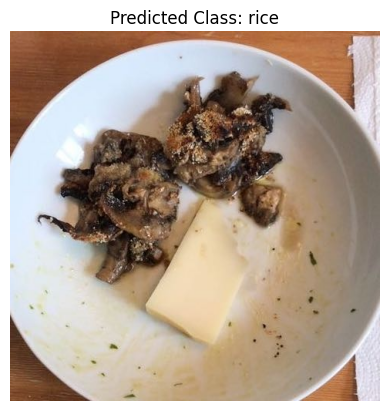

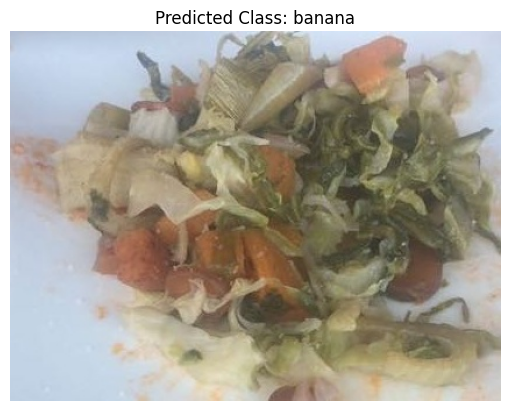

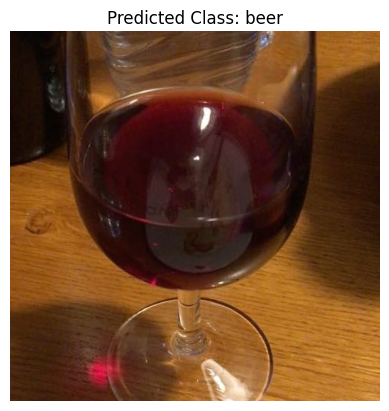

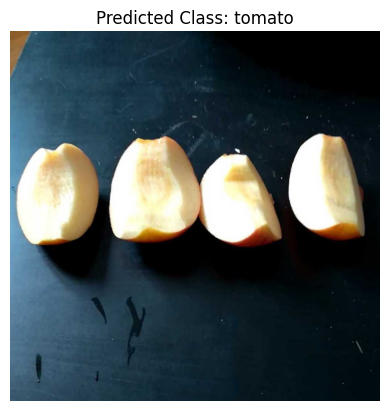

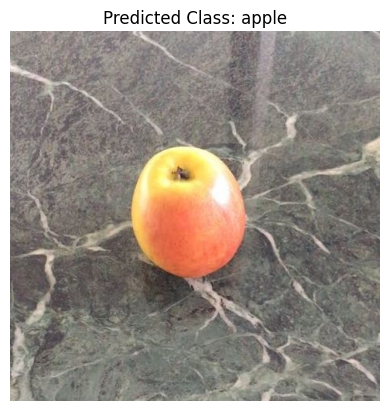

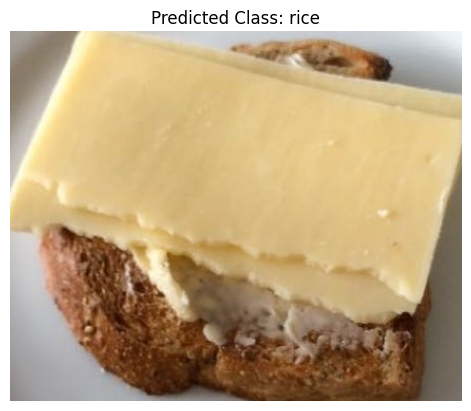

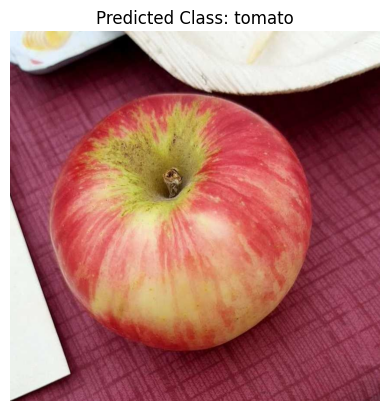

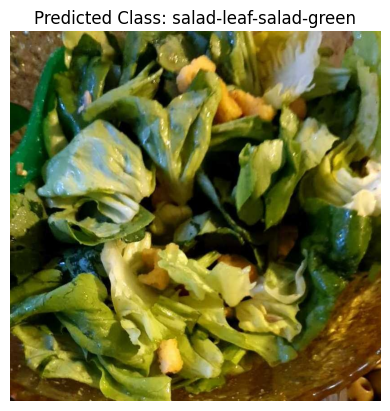

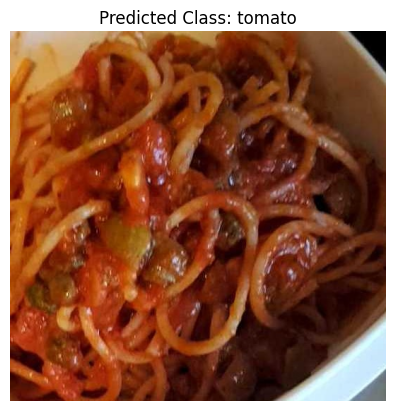

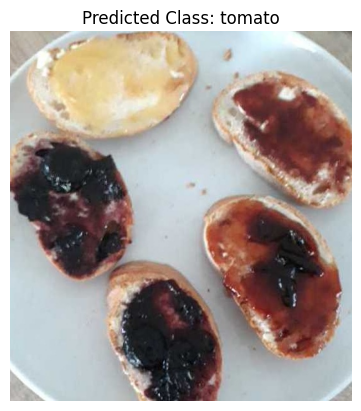

In [ ]:
unlabeled_dir = '/content/drive/MyDrive/Colab Notebooks/test_images/test_images'

random_images = random.sample(os.listdir(unlabeled_dir), 10)

# Load the model
model.load_state_dict(torch.load('Model.pth'))
model = model.to(device)
model.eval()

# Loop through the random images
for image_name in random_images:
    # Load the image
    image_path = os.path.join(unlabeled_dir, image_name)
    image = Image.open(image_path).convert('RGB')

    # Apply transformations
    input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Predict the class
    with torch.no_grad():
        output = model(input_image)
        _, predicted_idx = torch.max(output, 1)
        predicted_class = classes[predicted_idx.item()]

    # Display the image with the predicted class
    plt.imshow(image)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()
